In [95]:
!pip install keras

In [165]:
!pip install livelossplot

In [166]:
from livelossplot import PlotLossesKeras 

In [115]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image

In [116]:
datadir = "C:/Users/anime/OneDrive/Desktop/training"
categories = ["hi", "background"]

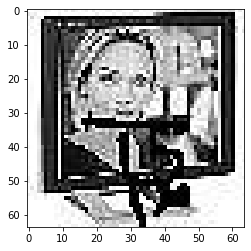

In [117]:
for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

In [118]:
print(img_array)

[[255 255 251 ... 249 234 252]
 [232 245 234 ... 255 255 248]
 [255 206 249 ... 251 242 244]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [119]:
img_array.shape

(64, 64)

In [120]:
training_data = []
def create_training_data():
        for category in categories:
            path = os.path.join(datadir, category)
            verdict = categories.index(category)
            for img in os.listdir(path):
                try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (50, 50))
                    training_data.append([new_array, verdict])
                except Exception as e:
                    print("broken")
create_training_data()        

In [121]:
print(len(training_data))


5875


In [122]:
import random

random.shuffle(training_data)

In [123]:
# for sample in training_data:
#     print(sample[1])

In [124]:
X = []
y = []

In [125]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 50, 50 , 1)
y = np.array(y)

In [147]:
print(X.shape)
y.shape

(5875, 50, 50, 1)


(5875,)

In [126]:
# import pickle

# pickle_out = open("X.pickle", "wb")
# pickle.dump(X. pickle_out)
# pickle_out.close()

In [127]:
len(X[0])

50

In [128]:
X = X/255

In [129]:
X_flattened = X.reshape(len(X), 50 * 50)

In [130]:
X_flattened.shape

(5875, 2500)

In [131]:
X_flattened[0]

array([0.8       , 0.81960784, 0.85098039, ..., 0.26666667, 0.19607843,
       0.14901961])

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, random_state = 1, test_size=0.2)

In [158]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4700, 2500) (1175, 2500) (4700,) (1175,)


In [167]:
from keras.callbacks import ModelCheckpoint

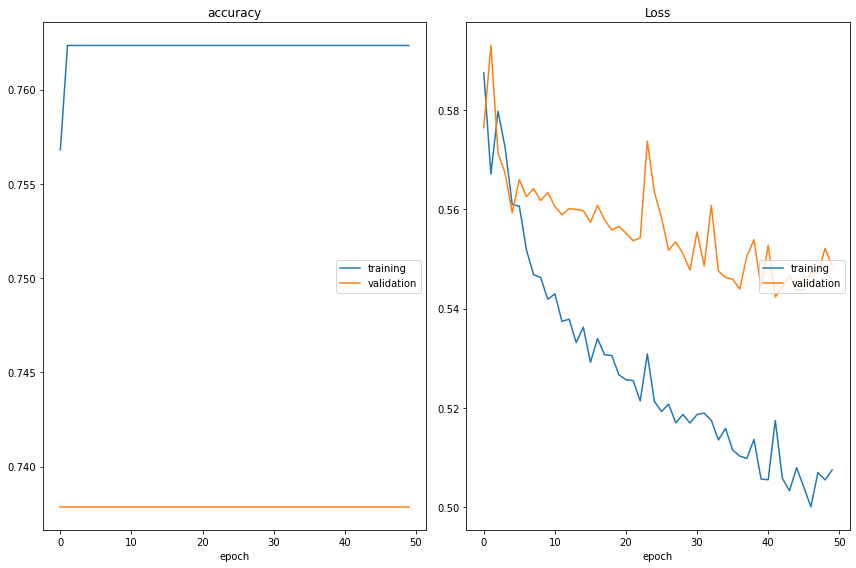

accuracy
	training         	 (min:    0.757, max:    0.762, cur:    0.762)
	validation       	 (min:    0.738, max:    0.738, cur:    0.738)
Loss
	training         	 (min:    0.500, max:    0.588, cur:    0.507)
	validation       	 (min:    0.542, max:    0.593, cur:    0.549)


In [170]:
model = keras.Sequential(
    [
    keras.layers.Dense(10, input_shape=(2500,), activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, input_shape=(2500,), activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# callbacks
mc_loss = ModelCheckpoint('Models/model1svd3.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, callbacks = [mc_loss, PlotLossesKeras()])

In [172]:
#from keras.models import load_models

##to load model
##load_model('Moldels/model1svd3.h5')
